In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PanelStudyIncomeDynamics_2011.csv")

In [92]:
# at least 26 weeks of work
df = df[df['annwks']>25]
# full time job
df = df[df['ft'] == 1]
# all data is non self-employee, non military
# delete Agriculture
df = df[df['Agriculture'] == 0]

In [141]:
df[['annhrs','annhrs2']].corr()

,annhrs,annhrs2
annhrs,1.00000,0.96354
annhrs2,0.96354,1.00000


975

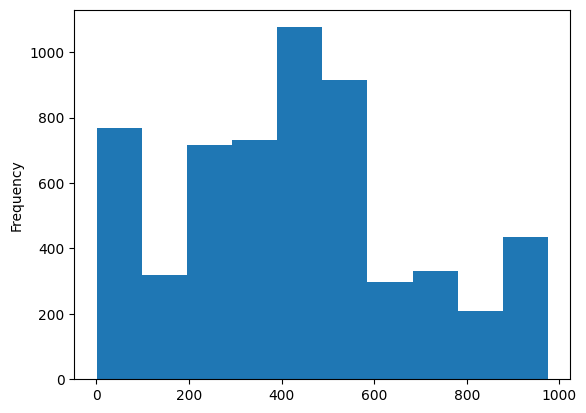

In [34]:
# https://usa.ipums.org/usa/volii/occ2000.shtml
# no military, no self-employee
df['occ'].plot(kind='hist')
df['occ'].max()

<Axes: ylabel='Frequency'>

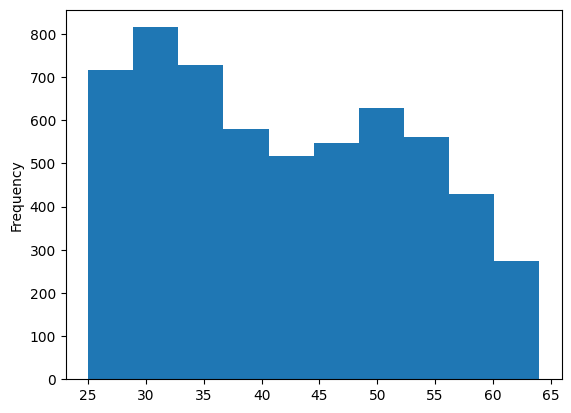

In [14]:
df['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

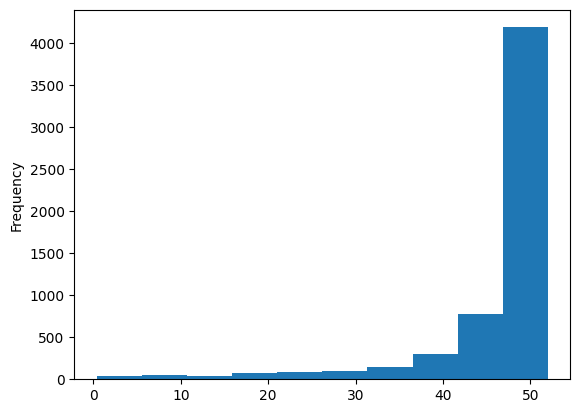

In [18]:
df['annwks'].plot(kind='hist')

<Axes: ylabel='Frequency'>

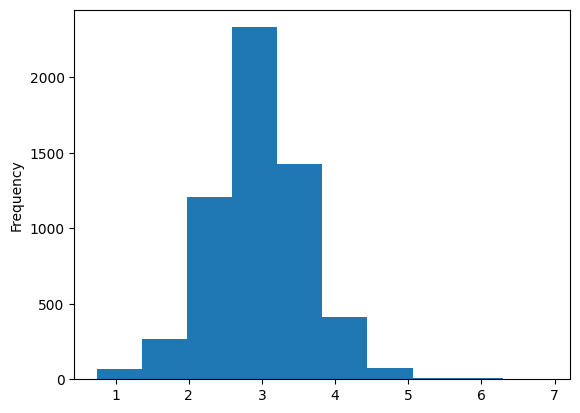

In [19]:
df['lnrealwg'].plot(kind='hist')

<Axes: ylabel='Frequency'>

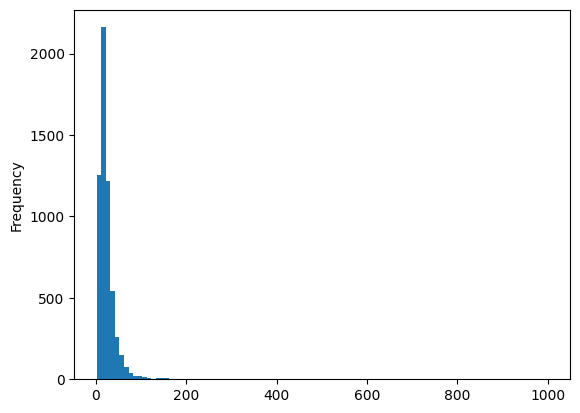

In [24]:
df['realhrwage'].plot(kind='hist',bins=100)

In [106]:
occ = pd.read_html('https://usa.ipums.org/usa/volii/occ2000.shtml')[1]
occ = pd.DataFrame(occ['Occupation']['Not Applicable'].values, index = occ['1% File']['Not Applicable'].values, columns=['Occupation'])
occ['Industry'] = [i if len(i)!= 3 else np.nan for i in occ.index]
occ = occ.ffill()
occ = occ.loc[[i for i in occ.index if len(i)== 3]]
occ.loc['000', 'Industry'] = 'NA'
occ.index = occ.index.astype(int)

In [110]:
df['Industry'] = occ.loc[df['occ']]['Industry'].values

In [134]:
degree = pd.Series({0: 'no college degree', 1: 'bachelor’s without advanced degree', 2: 'advanced degree'})

In [133]:
df['Degree'] = degree.reindex(df['degree']).values

In [144]:
col = ['sex','region','famwgt','relhead','age','sch','annhrs','annlabinc','white','black','hisp','othrace',\
    'annwks','unjob','usualhrwk','labincbus','yrsexp','yrsftexp','yrsptexp','yrsptexpsq','yrsftexpsq','yrsExpSq',\
        'wtrgov','smsa','hrwage','northeast','northcentral','south','west','lnrealwg','potexp','potexp2','ba','adv',\
            'LEHS','Industry','Degree']

In [145]:
df[col]

,sex,region,famwgt,relhead,age,sch,annhrs,annlabinc,white,black,...,south,west,lnrealwg,potexp,potexp2,ba,adv,LEHS,Industry,Degree
0,1,1,38.877998,10,39,18,1944,46500.0,1,0,...,0,0,3.174705,15,225,0,1,0,Healthcare Practitioners and Technical Occupat...,advanced degree
1,1,4,6.903000,10,36,12,2080,28000.0,1,0,...,0,1,2.599837,18,324,0,0,1,Healthcare Support Occupations,no college degree
2,1,3,3.742000,10,26,16,2196,42000.0,0,1,...,1,0,2.951032,4,16,0,0,1,"Arts, Design, Entertainment, Sports, and Media...",no college degree
3,1,4,25.271999,10,55,12,1968,48000.0,1,0,...,0,1,3.194183,37,1369,0,0,1,Construction Trades,no college degree
4,1,4,32.091000,10,49,17,1900,63000.0,0,0,...,0,1,3.501281,26,676,0,0,1,"Education, Training, and Library Occupations",no college degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,2,3,2.428000,20,58,12,2040,42000.0,0,1,...,1,0,3.024720,40,1600,0,0,1,Healthcare Support Occupations,no college degree
5789,2,4,19.155001,10,37,14,1888,25000.0,1,0,...,0,1,2.583358,17,289,0,0,1,Healthcare Support Occupations,no college degree
5790,2,1,17.472000,22,28,16,1995,50000.0,1,0,...,0,0,3.221379,6,36,1,0,0,Sales Occupations,bachelor’s without advanced degree
5792,2,2,28.830000,20,46,12,2156,35000.0,1,0,...,0,0,2.787093,28,784,0,0,1,Transportation and Material Moving Occupations,no college degree
